# Introduction
In this notebook , we are going to do following steps. 
- Drop irrelevant columns.
- Create dummy or indicator features for categorical variables
- Standardize the magnitude of numeric features using a scaler
- Split your data into testing and training datasets

_________________________________________________________________

In [1]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#Load the data
df_2019=pd.read_csv('Data/loan_2019_feature.csv')

In [3]:
#Exploring the data
df_2019.head().transpose()





,0,1,2,3,4
Year,2019,2019,2019,2019,2019
LoanCharacteristicsID,2407198,2407199,2407200,2407201,2407202
Bank,Boston,Boston,Boston,Boston,Boston
FIPSStateNumericCode,50,50,50,50,23
FIPSCountyCode,7,7,15,17,31
CoreBasedStatisticalAreaCode,15540,15540,99999,30100,38860
CensusTractIdentifier,34,29,9532,9594,254
CensusTractMinorityRatioPercent,4.577,3.421,6.152,3.935,6.031
CensusTractMedFamIncomeAmount,132474,100795,49625,62643,87679
LocalAreaMedianIncomeAmount,84290,84290,67566,67105,76445


In [4]:
#Load the data
col_dtype=pd.read_csv('Data/col_dtype.csv')

In [5]:
col_dtype

,Column_Name,Type
0,Year,drop
1,LoanCharacteristicsID,drop
2,Bank,cat
3,FIPSStateNumericCode,drop
4,FIPSCountyCode,drop
5,CoreBasedStatisticalAreaCode,drop
6,CensusTractIdentifier,drop
7,CensusTractMinorityRatioPercent,num
8,CensusTractMedFamIncomeAmount,drop
9,LocalAreaMedianIncomeAmount,num


In [6]:
#Function to convert col into categorical
def convert_to_cat(df_2019,col):
    df_2019[col]=df_2019[col].astype('category')
    return df_2019

In [7]:
#Drop rows with No race info.
df_2019=df_2019[df_2019["Borrower1Race1Type"]!='No Information']
df_2019.shape

(82415, 55)

In [8]:
#Convert Categorical variables
df_2019_dumm=df_2019.copy()
for i in range(col_dtype.shape[0]):
    col=col_dtype.iloc[i,:].Column_Name
    if col_dtype.iloc[i,:].Type == 'cat' and col_dtype.iloc[i,:].Column_Name != "Borrower1Race1Type" :
        df_2019_dumm=convert_to_cat(df_2019_dumm,col)
    elif col_dtype.iloc[i,:].Type == 'drop':
        df_2019_dumm.drop([col], inplace=True, axis=1)

In [9]:
df_2019_dumm

,Bank,CensusTractMinorityRatioPercent,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,LoanAcquisitionActualUPBAmt,LTVRatioPercent,LoanPurposeType,ProductCategoryName,MortgageType,...,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PMICoveragePercent,EmploymentBorrowerSelfEmployed,PropertyType,Borrower1EthnicityType,HOEPALoanStatusType,LienPriorityType,TotalYearlyIncomeAmount,Diff_median_yearly_income
0,Boston,4.577,84290.0,7308,93000,319113,99.0,1,1,1,...,1,9,0.0,1,PT01,2,2,1,87696,3406.0
1,Boston,3.421,84290.0,7416,93000,248005,97.0,1,1,1,...,3,2,0.0,1,PT01,2,2,1,88992,4702.0
2,Boston,6.152,67566.0,5143,71900,211105,99.0,1,1,1,...,2,3,0.0,1,PT01,2,2,1,61716,-5850.0
3,Boston,3.935,67105.0,8866,71900,210000,100.0,1,1,2,...,4,2,0.0,1,PT01,2,2,1,106392,39287.0
4,Boston,6.031,76445.0,15240,90100,233200,80.0,1,1,0,...,5,9,0.0,1,PT01,2,2,1,182880,106435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89762,Topeka,17.119,69210.0,3275,70000,133000,95.0,1,1,0,...,5,9,30.0,0,PT01,2,2,1,39300,-29910.0
89763,Topeka,5.698,69210.0,11500,70000,295000,84.0,1,1,0,...,5,5,6.0,0,PT01,2,2,1,138000,68790.0
89764,Topeka,13.887,73964.0,4298,75200,77250,46.0,6,1,0,...,5,5,0.0,0,PT01,2,2,1,51576,-22388.0
89765,Topeka,6.373,69210.0,6810,70000,207100,95.0,1,1,0,...,4,4,30.0,1,PT01,2,2,1,81720,12510.0


In [10]:
df_2019_dumm.dtypes

Bank                               category
CensusTractMinorityRatioPercent     float64
LocalAreaMedianIncomeAmount         float64
TotalMonthlyIncomeAmount              int64
HUDMedianIncomeAmount                 int64
LoanAcquisitionActualUPBAmt           int64
LTVRatioPercent                     float64
LoanPurposeType                    category
ProductCategoryName                category
MortgageType                       category
ScheduledTotalPaymentCount            int64
MortgageLoanSellerInstType         category
BorrowerCount                      category
BorrowerFirstTimeHomebuyer         category
Borrower1Race1Type                   object
Borrower1AgeAtApplicationYears        int64
Borrower2AgeAtApplicationYears        int64
PropertyUsageType                  category
PropertyUnitCount                     int64
NoteRatePercent                     float64
NoteAmount                            int64
HousingExpenseRatioPercent          float64
TotalDebtExpenseRatioPercent    

In [11]:
#Check NA values
import numpy as np
np.sum(df_2019_dumm.isna())

Bank                               0
CensusTractMinorityRatioPercent    0
LocalAreaMedianIncomeAmount        6
TotalMonthlyIncomeAmount           0
HUDMedianIncomeAmount              0
LoanAcquisitionActualUPBAmt        0
LTVRatioPercent                    0
LoanPurposeType                    0
ProductCategoryName                0
MortgageType                       0
ScheduledTotalPaymentCount         0
MortgageLoanSellerInstType         0
BorrowerCount                      0
BorrowerFirstTimeHomebuyer         0
Borrower1Race1Type                 0
Borrower1AgeAtApplicationYears     0
Borrower2AgeAtApplicationYears     0
PropertyUsageType                  0
PropertyUnitCount                  0
NoteRatePercent                    0
NoteAmount                         0
HousingExpenseRatioPercent         0
TotalDebtExpenseRatioPercent       0
Borrower1CreditScoreValue          0
Borrower2CreditScoreValue          0
PMICoveragePercent                 0
EmploymentBorrowerSelfEmployed     0
P

In [12]:
#Convert all the other races to Other Races
df_2019_white_n_other=df_2019_dumm.replace({"Black":"Other","Asian":"Other","Native Hawaiian":"Other","American Indian":"Other"})

In [13]:
#Drop NA rows
data=df_2019_white_n_other[~df_2019_white_n_other["LocalAreaMedianIncomeAmount"].isna()]

In [14]:
data.head()

,Bank,CensusTractMinorityRatioPercent,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,HUDMedianIncomeAmount,LoanAcquisitionActualUPBAmt,LTVRatioPercent,LoanPurposeType,ProductCategoryName,MortgageType,...,Borrower1CreditScoreValue,Borrower2CreditScoreValue,PMICoveragePercent,EmploymentBorrowerSelfEmployed,PropertyType,Borrower1EthnicityType,HOEPALoanStatusType,LienPriorityType,TotalYearlyIncomeAmount,Diff_median_yearly_income
0,Boston,4.577,84290.0,7308,93000,319113,99.0,1,1,1,...,1,9,0.0,1,PT01,2,2,1,87696,3406.0
1,Boston,3.421,84290.0,7416,93000,248005,97.0,1,1,1,...,3,2,0.0,1,PT01,2,2,1,88992,4702.0
2,Boston,6.152,67566.0,5143,71900,211105,99.0,1,1,1,...,2,3,0.0,1,PT01,2,2,1,61716,-5850.0
3,Boston,3.935,67105.0,8866,71900,210000,100.0,1,1,2,...,4,2,0.0,1,PT01,2,2,1,106392,39287.0
4,Boston,6.031,76445.0,15240,90100,233200,80.0,1,1,0,...,5,9,0.0,1,PT01,2,2,1,182880,106435.0


In [15]:
#Import Libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
#Import Library for ROC and AUC Curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [16]:
#Train test Split
y=data["Borrower1Race1Type"]
X=data.loc[:, data.columns != 'Borrower1Race1Type']

In [17]:
y.value_counts()

White    76980
Other     5429
Name: Borrower1Race1Type, dtype: int64

Any transformations like scaling, one hot encoding etc should be done on train set and then applied on test set. Hence we have to split data into train test split.

In [18]:
#Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(X_o_resampled, y_o_resampled,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [19]:
#Label Encode Target Variable
#Encode Output Lable: Shoould be after Train Test Split.
le = preprocessing.LabelEncoder()
le.fit(y_train)
le.classes_
y_train=le.transform(y_train)
y_test=le.transform(y_test)

## Check the Pipeline with Over Sampling

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [21]:
ros = RandomOverSampler(random_state=0)
X_o_resampled, y_o_resampled=ros.fit_resample(X_train, y_train)

In [22]:
X_train.dtypes

Bank                               category
CensusTractMinorityRatioPercent     float64
LocalAreaMedianIncomeAmount         float64
TotalMonthlyIncomeAmount              int64
HUDMedianIncomeAmount                 int64
LoanAcquisitionActualUPBAmt           int64
LTVRatioPercent                     float64
LoanPurposeType                    category
ProductCategoryName                category
MortgageType                       category
ScheduledTotalPaymentCount            int64
MortgageLoanSellerInstType         category
BorrowerCount                      category
BorrowerFirstTimeHomebuyer         category
Borrower1AgeAtApplicationYears        int64
Borrower2AgeAtApplicationYears        int64
PropertyUsageType                  category
PropertyUnitCount                     int64
NoteRatePercent                     float64
NoteAmount                            int64
HousingExpenseRatioPercent          float64
TotalDebtExpenseRatioPercent        float64
Borrower1CreditScoreValue       

In [23]:
#Get Numerical Columns
num_vars=list(X_train.dtypes[X_train.dtypes!='category'].index)
num_vars

['CensusTractMinorityRatioPercent',
 'LocalAreaMedianIncomeAmount',
 'TotalMonthlyIncomeAmount',
 'HUDMedianIncomeAmount',
 'LoanAcquisitionActualUPBAmt',
 'LTVRatioPercent',
 'ScheduledTotalPaymentCount',
 'Borrower1AgeAtApplicationYears',
 'Borrower2AgeAtApplicationYears',
 'PropertyUnitCount',
 'NoteRatePercent',
 'NoteAmount',
 'HousingExpenseRatioPercent',
 'TotalDebtExpenseRatioPercent',
 'PMICoveragePercent',
 'TotalYearlyIncomeAmount',
 'Diff_median_yearly_income']

In [24]:
#Get Categorical Columns
cat_vars=list(X_train.dtypes[X_train.dtypes=='category'].index)
cat_vars

['Bank',
 'LoanPurposeType',
 'ProductCategoryName',
 'MortgageType',
 'MortgageLoanSellerInstType',
 'BorrowerCount',
 'BorrowerFirstTimeHomebuyer',
 'PropertyUsageType',
 'Borrower1CreditScoreValue',
 'Borrower2CreditScoreValue',
 'EmploymentBorrowerSelfEmployed',
 'PropertyType',
 'Borrower1EthnicityType',
 'HOEPALoanStatusType',
 'LienPriorityType']

In [25]:
#Transform Numerical and Categorical Columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numerical', StandardScaler(with_mean=False), num_vars),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), cat_vars),
    
])

In [26]:
#data_pipeline.fit_transform(X_train).shape

In [27]:
#Build Pipline
#pipe = Pipeline([('enc',OneHotEncoder(handle_unknown='ignore')),('scaler', StandardScaler(with_mean=False)),('log_re', LogisticRegression(solver='lbfgs',max_iter=1000))])

In [28]:
#Bulid Pipeline
pipe = Pipeline([('preprocessor',preprocessor),('log_re', LogisticRegression(solver='lbfgs',max_iter=4000))])

In [29]:
#Use cross validation to fit the data
scores=cross_val_score(pipe, X_o_resampled, y_o_resampled, cv=5)
scores

array([0.74118819, 0.74131809, 0.74391617, 0.74173992, 0.73541766])

In [30]:
#Fit Pipeline
pipe.fit(X_o_resampled, y_o_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  StandardScaler(with_mean=False),
                                                  ['CensusTractMinorityRatioPercent',
                                                   'LocalAreaMedianIncomeAmount',
                                                   'TotalMonthlyIncomeAmount',
                                                   'HUDMedianIncomeAmount',
                                                   'LoanAcquisitionActualUPBAmt',
                                                   'LTVRatioPercent',
                                                   'ScheduledTotalPaymentCount',
                                                   'Borrower1AgeAtApplicationYears',
                                                   'Borrower2AgeAt...
                                                   'ProductCategoryName',
                                    

In [31]:
#Score on Test Data
#ros1 = RandomOverSampler(random_state=0)
#X_test_o, y_test_o=ros1.fit_resample(X_test, y_test)
#pipe.score(X_test_o, y_test_o)
pipe.score(X_test, y_test)

0.783332524389652

In [32]:
def plot_roc_auc(X_test,y_test,pipe):
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = pipe.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Racial Disparity: ROC AUC=%.3f' % (ns_auc))
    print('Current Classifier: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Racial Disparity')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Current Classifier')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show() 

In [33]:
def print_conf_mat(pipe,X_test):
    y_pred=pipe.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    labels=["White","Other"]
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.67      0.29      1357
           1       0.97      0.79      0.87     19246

    accuracy                           0.78     20603
   macro avg       0.58      0.73      0.58     20603
weighted avg       0.92      0.78      0.83     20603



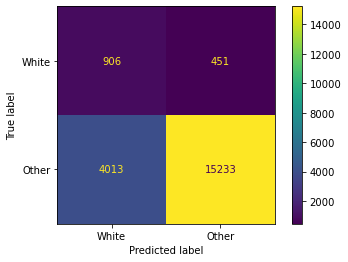

In [34]:
#Print Confusion Matrix
print_conf_mat(pipe,X_test)

No Racial Disparity: ROC AUC=0.500
Current Classifier: ROC AUC=0.801


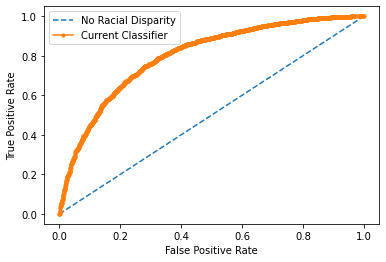

In [35]:
#Plot ROC and AUC Curve
plot_roc_auc(X_test,y_test,pipe)

##### Lets check the columns which are significant in Race Prediction

In [36]:
df2=pd.DataFrame(pipe.named_steps['log_re'].coef_).T

In [37]:
df1=pd.DataFrame(pipe.named_steps['preprocessor'].get_feature_names_out())

In [38]:
result = pd.concat([df1, df2], axis=1)

In [39]:
result.columns=['Column Name','Co-effient Value']

In [40]:
result.head()

,Column Name,Co-effient Value
0,numerical__CensusTractMinorityRatioPercent,-1.094123
1,numerical__LocalAreaMedianIncomeAmount,0.284832
2,numerical__TotalMonthlyIncomeAmount,0.012793
3,numerical__HUDMedianIncomeAmount,-0.469361
4,numerical__LoanAcquisitionActualUPBAmt,1.952254


In [41]:
result.shape

(80, 2)

In [42]:
#Check the Overall Statics of the co-effient values.
result.describe()

,Co-effient Value
count,80.000000
mean,0.007702
std,0.493583
min,-2.199225
25%,-0.122341
50%,0.019301
75%,0.162919
max,1.952254


In [43]:
#Check Co-eff with values greater than 1 
result[result['Co-effient Value']>1]

,Column Name,Co-effient Value
4,numerical__LoanAcquisitionActualUPBAmt,1.952254
71,categorical__PropertyType_PT12,1.329995
72,categorical__Borrower1EthnicityType_1,1.101818


Hence we see that Loan Acquisition Actual UPB Amount,Property Type and Borrower's Ethinicity has a significant impact on the race of the person.

In [44]:
#Check Co-eff with values greater than 0.5 
result[abs(result['Co-effient Value'])>0.5]

,Column Name,Co-effient Value
0,numerical__CensusTractMinorityRatioPercent,-1.094123
4,numerical__LoanAcquisitionActualUPBAmt,1.952254
11,numerical__NoteAmount,-2.199225
32,categorical__MortgageType_1,-1.358331
34,categorical__MortgageType_3,0.623290
64,categorical__PropertyType_PT05,-0.555933
67,categorical__PropertyType_PT08,-0.591076
71,categorical__PropertyType_PT12,1.329995
72,categorical__Borrower1EthnicityType_1,1.101818
75,categorical__Borrower1EthnicityType_4,-0.710349


In [45]:
#Check Co-eff with values less than -1
result[abs(result['Co-effient Value'])>1]

,Column Name,Co-effient Value
0,numerical__CensusTractMinorityRatioPercent,-1.094123
4,numerical__LoanAcquisitionActualUPBAmt,1.952254
11,numerical__NoteAmount,-2.199225
32,categorical__MortgageType_1,-1.358331
71,categorical__PropertyType_PT12,1.329995
72,categorical__Borrower1EthnicityType_1,1.101818


Hence we see that Minority Ratio and Note Amount is significant in predicting race of the person.

### Feature Selection Using Cross Validation


In [46]:
"""
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

rfe = RFE(estimator=LogisticRegression(solver='lbfgs',max_iter=4000), n_features_to_select=6)
model = LogisticRegression(solver='lbfgs',max_iter=4000)
pipe = Pipeline([('preprocessor',preprocessor),('Feature Selection', rfe), ('Model', model)])

scores=cross_val_score(pipe, X_o_resampled, y_o_resampled, cv=5)
scores

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
#n_scores = cross_val_score(pipe, X_o_resampled, y_o_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
"""

"\nfrom sklearn.feature_selection import RFE\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import cross_val_score\n\nrfe = RFE(estimator=LogisticRegression(solver='lbfgs',max_iter=4000), n_features_to_select=6)\nmodel = LogisticRegression(solver='lbfgs',max_iter=4000)\npipe = Pipeline([('preprocessor',preprocessor),('Feature Selection', rfe), ('Model', model)])\n\nscores=cross_val_score(pipe, X_o_resampled, y_o_resampled, cv=5)\nscores\n\n#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)\n#n_scores = cross_val_score(pipe, X_o_resampled, y_o_resampled, scoring='accuracy', cv=cv, n_jobs=-1)\n"

## Ridge Classifier

In [47]:
from sklearn.linear_model import RidgeClassifier
pipe_ridge = Pipeline([('preprocessor',preprocessor),('lass', RidgeClassifier())])

In [48]:
#Use cross validation to fit the data
scores=cross_val_score(pipe_ridge, X_o_resampled, y_o_resampled, cv=5)
scores

array([0.73646835, 0.73521261, 0.73923963, 0.73831897, 0.72974494])

In [49]:
pipe_ridge.fit(X_o_resampled, y_o_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  StandardScaler(with_mean=False),
                                                  ['CensusTractMinorityRatioPercent',
                                                   'LocalAreaMedianIncomeAmount',
                                                   'TotalMonthlyIncomeAmount',
                                                   'HUDMedianIncomeAmount',
                                                   'LoanAcquisitionActualUPBAmt',
                                                   'LTVRatioPercent',
                                                   'ScheduledTotalPaymentCount',
                                                   'Borrower1AgeAtApplicationYears',
                                                   'Borrower2AgeAt...
                                                  ['Bank', 'LoanPurposeType',
                                

In [50]:
pipe_ridge.score(X_test,y_test)

0.7941076542251129

              precision    recall  f1-score   support

           0       0.19      0.65      0.29      1357
           1       0.97      0.80      0.88     19246

    accuracy                           0.79     20603
   macro avg       0.58      0.73      0.59     20603
weighted avg       0.92      0.79      0.84     20603



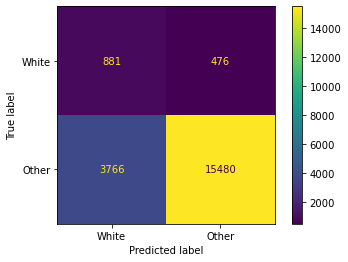

In [51]:
#Print Confusion Matrix
print_conf_mat(pipe_ridge,X_test)

In [52]:
def get_coff(clf_name,preprocessor,pipe):
    df2=pd.DataFrame(pipe.named_steps[clf_name].coef_).T
    df1=pd.DataFrame(pipe.named_steps[preprocessor].get_feature_names_out())
    result = pd.concat([df1, df2], axis=1)
    result.columns=['Column Name','Co-effient Value']
    return result

In [53]:
co_eff_df=get_coff('lass','preprocessor',pipe_ridge)

In [54]:
co_eff_df[abs(co_eff_df['Co-effient Value'])>0.5]

,Column Name,Co-effient Value
4,numerical__LoanAcquisitionActualUPBAmt,0.634231
11,numerical__NoteAmount,-0.727673
61,categorical__PropertyType_PT02,0.918317


## Logistic L1 loss

In [55]:
#Bulid Pipeline
pipe_l1 = Pipeline([('preprocessor',preprocessor),('log_re_l1', LogisticRegression(solver='liblinear',max_iter=4000,penalty='l1'))])

In [56]:
#Use cross validation to fit the data
scores=cross_val_score(pipe_l1, X_o_resampled, y_o_resampled, cv=5)
scores

array([0.74131809, 0.74101498, 0.74408937, 0.74165331, 0.73533105])

In [57]:
#Fit Pipeline
pipe_l1.fit(X_o_resampled, y_o_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  StandardScaler(with_mean=False),
                                                  ['CensusTractMinorityRatioPercent',
                                                   'LocalAreaMedianIncomeAmount',
                                                   'TotalMonthlyIncomeAmount',
                                                   'HUDMedianIncomeAmount',
                                                   'LoanAcquisitionActualUPBAmt',
                                                   'LTVRatioPercent',
                                                   'ScheduledTotalPaymentCount',
                                                   'Borrower1AgeAtApplicationYears',
                                                   'Borrower2AgeAt...
                                                   'MortgageLoanSellerInstType',
                             

In [58]:
pipe_l1.score(X_test, y_test)

0.7835266708731738

              precision    recall  f1-score   support

           0       0.18      0.67      0.29      1357
           1       0.97      0.79      0.87     19246

    accuracy                           0.78     20603
   macro avg       0.58      0.73      0.58     20603
weighted avg       0.92      0.78      0.83     20603



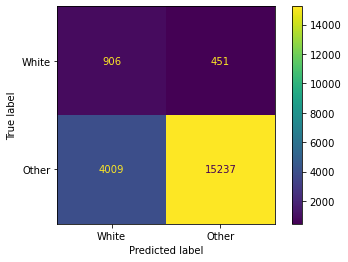

In [59]:
#Print Confusion Matrix
print_conf_mat(pipe_l1,X_test)

No Racial Disparity: ROC AUC=0.500
Current Classifier: ROC AUC=0.801


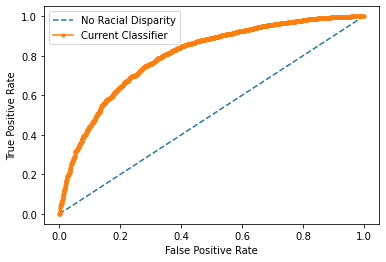

In [60]:
#Plot ROC and AUC Curve
plot_roc_auc(X_test,y_test,pipe_l1)

In [61]:
co_eff_df=get_coff('log_re_l1','preprocessor',pipe_l1)

In [62]:
co_eff_df[abs(co_eff_df['Co-effient Value'])>1]

,Column Name,Co-effient Value
0,numerical__CensusTractMinorityRatioPercent,-1.094221
4,numerical__LoanAcquisitionActualUPBAmt,1.633203
11,numerical__NoteAmount,-1.880240
32,categorical__MortgageType_1,-1.788086
61,categorical__PropertyType_PT02,2.199671
71,categorical__PropertyType_PT12,1.583698
72,categorical__Borrower1EthnicityType_1,1.421201


Hence we see the LoanAcquistion Amount,Noteamount, Minority Ratio,Mortage Type has a huge empact on deciding race of the person.

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
#Build Pipline using Logistic Regression
pipe = Pipeline([('preprocessor',preprocessor), ('rand_for', RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=2, random_state=0))])

In [65]:
#Use cross validation to fit the data
scores=cross_val_score(pipe, X_o_resampled, y_o_resampled, cv=5)
scores

array([0.99229237, 0.9931584 , 0.9932883 , 0.991859  , 0.9918157 ])

In [66]:
#Fit the pipe
pipe.fit(X_o_resampled, y_o_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  StandardScaler(with_mean=False),
                                                  ['CensusTractMinorityRatioPercent',
                                                   'LocalAreaMedianIncomeAmount',
                                                   'TotalMonthlyIncomeAmount',
                                                   'HUDMedianIncomeAmount',
                                                   'LoanAcquisitionActualUPBAmt',
                                                   'LTVRatioPercent',
                                                   'ScheduledTotalPaymentCount',
                                                   'Borrower1AgeAtApplicationYears',
                                                   'Borrower2AgeAt...
                                                   'MortgageType',
                                           

In [67]:
#Confusion Matrix
y_pred=pipe.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  168  1189]
 [  201 19045]]
              precision    recall  f1-score   support

           0       0.46      0.12      0.19      1357
           1       0.94      0.99      0.96     19246

    accuracy                           0.93     20603
   macro avg       0.70      0.56      0.58     20603
weighted avg       0.91      0.93      0.91     20603



In [68]:
#Score on Test Data
pipe.score(X_test, y_test)

0.9325340969761685

No Racial Disparity: ROC AUC=0.500
Current Classifier: ROC AUC=0.773


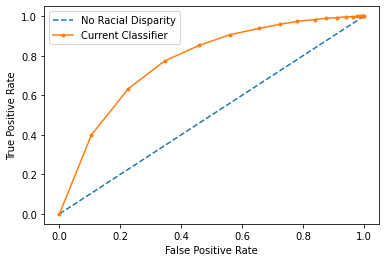

In [69]:
#Plot ROC and AUC
plot_roc_auc(X_test,y_test,pipe)

In [70]:
#importance = pipe.feature_importances_
df2=pd.DataFrame(pipe.named_steps["rand_for"].feature_importances_)

In [71]:
df2

,0
0,0.206631
1,0.049722
2,0.045085
3,0.045927
4,0.054506
...,...
75,0.000003
76,0.000007
77,0.000144
78,0.000153


In [72]:
df1=pd.DataFrame(pipe.named_steps["preprocessor"].get_feature_names_out())
df1

,0
0,numerical__CensusTractMinorityRatioPercent
1,numerical__LocalAreaMedianIncomeAmount
2,numerical__TotalMonthlyIncomeAmount
3,numerical__HUDMedianIncomeAmount
4,numerical__LoanAcquisitionActualUPBAmt
...,...
75,categorical__Borrower1EthnicityType_4
76,categorical__HOEPALoanStatusType_1
77,categorical__HOEPALoanStatusType_2
78,categorical__HOEPALoanStatusType_3


In [73]:
result = pd.concat([df1, df2], axis=1)
result

,0,0
0,numerical__CensusTractMinorityRatioPercent,0.206631
1,numerical__LocalAreaMedianIncomeAmount,0.049722
2,numerical__TotalMonthlyIncomeAmount,0.045085
3,numerical__HUDMedianIncomeAmount,0.045927
4,numerical__LoanAcquisitionActualUPBAmt,0.054506
...,...,...
75,categorical__Borrower1EthnicityType_4,0.000003
76,categorical__HOEPALoanStatusType_1,0.000007
77,categorical__HOEPALoanStatusType_2,0.000144
78,categorical__HOEPALoanStatusType_3,0.000153


In [74]:
result.columns=['Column Name','Co-effient Value']


In [75]:
result.head(10)

,Column Name,Co-effient Value
0,numerical__CensusTractMinorityRatioPercent,0.206631
1,numerical__LocalAreaMedianIncomeAmount,0.049722
2,numerical__TotalMonthlyIncomeAmount,0.045085
3,numerical__HUDMedianIncomeAmount,0.045927
4,numerical__LoanAcquisitionActualUPBAmt,0.054506
5,numerical__LTVRatioPercent,0.034857
6,numerical__ScheduledTotalPaymentCount,0.007850
7,numerical__Borrower1AgeAtApplicationYears,0.048264
8,numerical__Borrower2AgeAtApplicationYears,0.026151
9,numerical__PropertyUnitCount,0.000878


In [76]:
result.sort_values(by=['Co-effient Value'],ascending=False).head(10)

,Column Name,Co-effient Value
0,numerical__CensusTractMinorityRatioPercent,0.206631
4,numerical__LoanAcquisitionActualUPBAmt,0.054506
11,numerical__NoteAmount,0.050859
12,numerical__HousingExpenseRatioPercent,0.050026
1,numerical__LocalAreaMedianIncomeAmount,0.049722
13,numerical__TotalDebtExpenseRatioPercent,0.048692
7,numerical__Borrower1AgeAtApplicationYears,0.048264
3,numerical__HUDMedianIncomeAmount,0.045927
16,numerical__Diff_median_yearly_income,0.045497
2,numerical__TotalMonthlyIncomeAmount,0.045085


Hence we see that Minority Ratio,LoanAcquisitionActualUPBAmt,Note Amount , HousingExpenseRatioPercent,LocalAreaMedianIncomeAmount 
are the most significant co-efficients.

## Conclusion

After trying above model , we found some features are signifanctly related to Race of the person. 
- CensusTractMinorityRatioPercent	
- LoanAcquisitionActualUPBAmt	
- NoteAmount	
- HousingExpenseRatioPercent	
- LocalAreaMedianIncomeAmount
- MortgageType_1
- Borrower1EthnicityType_1	